In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
class SimpleLinearRegressor:
    
    ''' Defines Simple Linear Regressor which finds best fit line for the given data. '''
    
    def __init__(self, X, y):
        '''
        Parameters :
        ------------
        
        X --> Independent Variable, type : pandas.core.series.Series
        y --> Dependent Variable  , type : pandas.core.series.Series  
        '''
        self.X = X
        self.y = y
    
    def fit(self):
        
        self._X_mean = self.X.mean()
        self._y_mean = self.y.mean()
        
        _X_mean_diff = self.X - self._X_mean
        _y_mean_diff = self.y - self._y_mean
        
        self.slope = (_X_mean_diff * _y_mean_diff).sum() / (_X_mean_diff ** 2).sum()
        
        self.intercept = self._y_mean - (self.slope * self._X_mean)
        
        s = "Slope is {0} and y-Intercept is {1}"
        return s.format(self.slope, self.intercept)
    
    def plot_regressor(self):
        plt.figure(figsize=(10, 7))
        plt.scatter(self.X, self.y)
        plt.scatter(self._X_mean, self._y_mean, marker = '^', s=100, color = 'm')
        _y_pred = self.X * self.slope + self.intercept
        plt.plot(self.X, _y_pred, 'g')
        plt.show()
        return
    
    def mse(self):
        ''' Returns Mean Squared Error '''
        _y_pred = self.X * self.slope + self.intercept
        return ((self.y - _y_pred)**2).sum() / len(self.y)
    
    def rmse(self):
        return self.mse()**0.5
    
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
        _y_pred = self.X * self.slope + self.intercept
        line_1_sum = ((self.y - _y_pred) ** 2).sum()
        line_2_sum = ((self.y - self._y_mean) ** 2).sum()
        # print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

In [52]:
x = np.arange(2000, -2001, -1)

In [53]:
x.shape

(4001,)

In [54]:
df = pd.DataFrame({'X' : x})
df.head()

,X
0,2000
1,1999
2,1998
3,1997
4,1996


In [55]:
def y(x):
    return( 1 / (1 + np.exp(x)) )


In [56]:
df['y'] = df['X'].apply(y)

In [57]:
df.head()

,X,y
0,2000,0.0
1,1999,0.0
2,1998,0.0
3,1997,0.0
4,1996,0.0


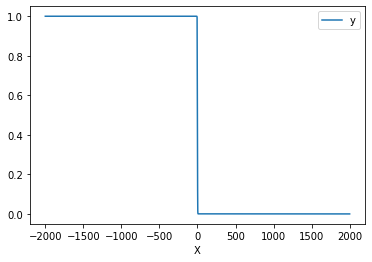

In [58]:
df.plot('X', 'y')

In [2]:
df = pd.DataFrame({'X' : list(range(0, 100))})
df

,X
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [4]:
df['y'] = 0
df['y'][df['X'] > 50] = 1
df

,X,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
95,95,1
96,96,1
97,97,1
98,98,1


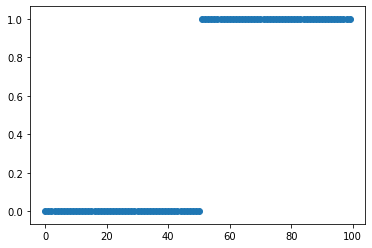

In [8]:
plt.scatter(df['X'], df['y'])

In [10]:
r = SimpleLinearRegressor(df['X'], df['y'])
r.fit()

'Slope is 0.01499549954995499 and y-Intercept is -0.25227722772277206'

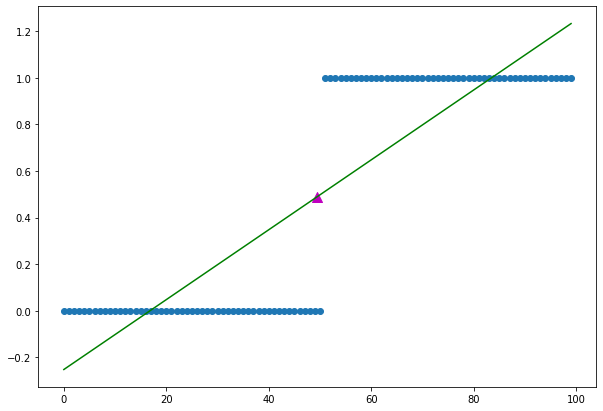

In [11]:
r.plot_regressor()

In [15]:
df = df.append(pd.DataFrame({'X' : [500], 'y' : [1]}), ignore_index=True)

In [16]:
df

,X,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
96,96,1
97,97,1
98,98,1
99,99,1


In [17]:
reg = SimpleLinearRegressor(df['X'], df['y'])
reg.fit()

'Slope is 0.0051957709367712905 and y-Intercept is 0.21468364747125213'

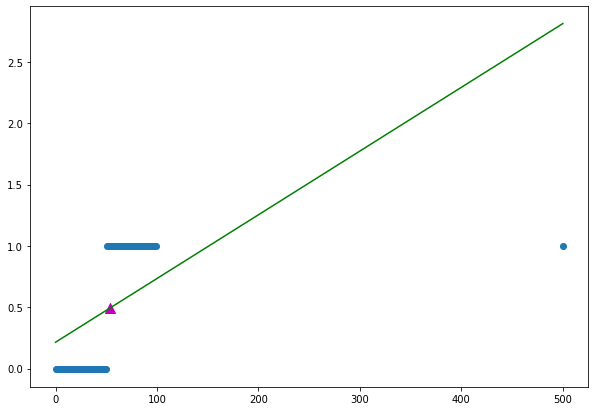

In [18]:
reg.plot_regressor()

In [80]:
df = pd.DataFrame({'X' : list(range(0, 100))})
df

,X
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [81]:
df['y'] = 0
df['y'][df['X'] > 50] = 1
df

,X,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
95,95,1
96,96,1
97,97,1
98,98,1


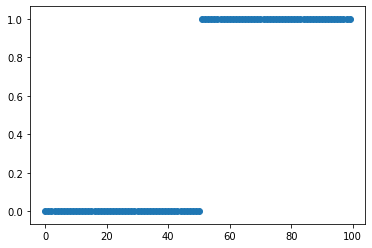

In [82]:
plt.scatter(df['X'], df['y'])

In [83]:
r = SimpleLinearRegressor(df['X'], df['y'])
r.fit()

'Slope is 0.01499549954995499 and y-Intercept is -0.25227722772277206'

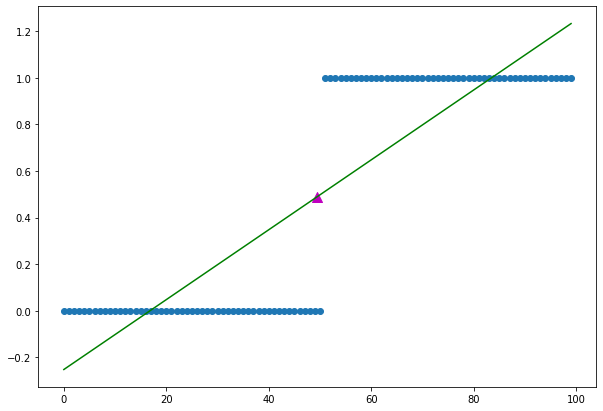

In [84]:
r.plot_regressor()

In [85]:
df['y_pred_lin'] = r.slope * df['X'] + r.intercept
df

,X,y,y_pred_lin
0,0,0,-0.252277
1,1,0,-0.237282
2,2,0,-0.222286
3,3,0,-0.207291
4,4,0,-0.192295
...,...,...,...
95,95,1,1.172295
96,96,1,1.187291
97,97,1,1.202286
98,98,1,1.217282


In [86]:
df['y_pred_log'] = 1 / (1 + np.exp(df['y_pred_lin']))
df.head()

,X,y,y_pred_lin,y_pred_log
0,0,0,-0.252277,0.562737
1,1,0,-0.237282,0.559044
2,2,0,-0.222286,0.555344
3,3,0,-0.207291,0.551638
4,4,0,-0.192295,0.547926


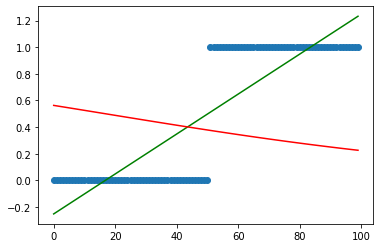

In [87]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['y_pred_lin'], color = 'g')
plt.plot(df['X'], df['y_pred_log'], color = 'r')

In [88]:
df.drop(['y_pred_lin', 'y_pred_log'], axis = 1, inplace = True)

In [92]:
df.loc[0, 'y'] = 0
df.loc[10, 'y'] = 1
df.loc[20, 'y'] = 1
df.loc[30, 'y'] = 1
df.loc[40, 'y'] = 1
df.loc[50, 'y'] = 0
df.loc[60, 'y'] = 0
df.loc[70, 'y'] = 0
df.loc[80, 'y'] = 0
df.loc[90, 'y'] = 1

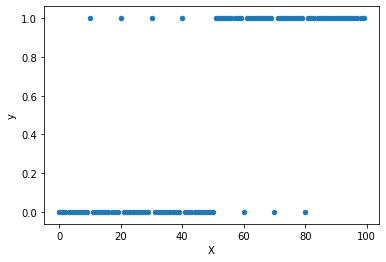

In [93]:
df.plot('X', 'y','scatter')

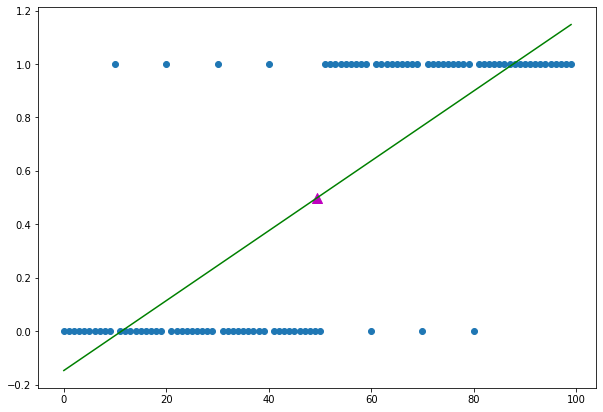

In [94]:
r = SimpleLinearRegressor(df['X'], df['y'])
r.fit()
r.plot_regressor()